In [25]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # import the random forest model
from sklearn import  preprocessing # used for label encoding and imputing NaNs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

import datetime as dt # we will need this to convert the date to a number of days since some point

from sklearn.tree import export_graphviz
from sklearn import tree

# Acceptance Status will be predicted using 3 models

In [26]:
fare_data = pd.read_csv("train.csv")
fare_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [27]:
#import the times for pickup_time, drop_time
fare_data = pd.read_csv("train.csv", parse_dates=['pickup_time', 'drop_time'])
fare_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [28]:
fare_data.dropna(inplace=True)

As we have enough data, small number of data is NaN, we can drop those rows)

In [29]:
#Encoding categorical features
#assign a numeric value to label


In [30]:
fare_data["binary_label"] = np.where(fare_data["label"].str.contains("incorrect"), 0,1)

In [31]:
#categorical data preprocess done
fare_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,binary_label
0,189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,1
5,189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,1


In [32]:
#remove unwanted columns
X_fare_data = fare_data.drop(['tripid', 'pickup_time', 'drop_time', 'label', 'binary_label'], axis=1)
y_fare_data = fare_data['binary_label']

In [33]:
X_fare_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 0 to 17175
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16968 non-null  float64
 1   duration                   16968 non-null  float64
 2   meter_waiting              16968 non-null  float64
 3   meter_waiting_fare         16968 non-null  float64
 4   meter_waiting_till_pickup  16968 non-null  float64
 5   pick_lat                   16968 non-null  float64
 6   pick_lon                   16968 non-null  float64
 7   drop_lat                   16968 non-null  float64
 8   drop_lon                   16968 non-null  float64
 9   fare                       16968 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [34]:
X_fare_data.shape

(16968, 10)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_fare_data, y_fare_data, test_size = 0.20)

In [36]:
X_train.shape

(13574, 10)

In [37]:
X_test.shape

(3394, 10)

In [38]:
#decision tree

In [39]:
model = tree.DecisionTreeClassifier()

In [40]:
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
y_pred = model.predict(X_test)
# Check the training error
model.score(X_test, y_test)

0.9195639363582793

Feature Selection By Gradient Boost Tree for RandomForestClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [43]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print ("Classification report: ", classification_report(y_test, y_pred))
    return accuracy_score(y_test,y_pred)

In [44]:
def run_gradientBoostingForest(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print ("Classification report: ", classification_report(y_test, y_pred))
    return accuracy_score(y_test,y_pred)

In [45]:
number_of_features = [1,2,3,4,5,6,7,8,9,10]
accuracy_random_forest_gradient_boost_RFE = [None,None,None,None,None,None,None,None,None,None]
accuracy_random_forest_random_forest_RFE = [None,None,None,None,None,None,None,None,None,None]
accuracy_gradient_boost_gradient_boost_RFE = [None,None,None,None,None,None,None,None,None,None]
accuracy_decision_tree_decision_tree_RFE = [None,None,None,None,None,None,None,None,None,None]
accuracy_decision_tree_gradient_boosting_RFE = [None,None,None,None,None,None,None,None,None,None]

In [46]:
for index in range(1, 11):
    gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = index)
    gradientBoostRFELoop.fit(X_train,y_train)
    X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
    X_test_Grad_RFELoop = gradientBoostRFELoop.transform(X_test)
    print("number of selected features:", index)
    accuracy_random_forest_gradient_boost_RFE[index-1] = run_randomForest(X_train_Grad_RFELoop, X_test_Grad_RFELoop, y_train, y_test)
    print()

number of selected features: 1
Accuracy:  0.9021803182086034
Classification report:                precision    recall  f1-score   support

           0       0.36      0.16      0.22       295
           1       0.92      0.97      0.95      3099

    accuracy                           0.90      3394
   macro avg       0.64      0.57      0.59      3394
weighted avg       0.88      0.90      0.88      3394


number of selected features: 2
Accuracy:  0.9398939304655274
Classification report:                precision    recall  f1-score   support

           0       0.72      0.51      0.60       295
           1       0.95      0.98      0.97      3099

    accuracy                           0.94      3394
   macro avg       0.84      0.74      0.78      3394
weighted avg       0.93      0.94      0.94      3394


number of selected features: 3
Accuracy:  0.9446081319976429
Classification report:                precision    recall  f1-score   support

           0       0.76      0.53 

Gradient Boosting Algorithm for RFE

In [47]:
for index in range (1, 11):
    gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = index)
    gradientBoostRFELoop.fit(X_train,y_train)
    X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
    X_test_Grad_RFELoop = gradientBoostRFELoop.transform(X_test)
    print("number of selected features:", index)
    accuracy_gradient_boost_gradient_boost_RFE[index-1] = run_gradientBoostingForest(X_train_Grad_RFELoop, X_test_Grad_RFELoop, y_train, y_test)
    print()

number of selected features: 1
Accuracy:  0.9166175604007071
Classification report:                precision    recall  f1-score   support

           0       0.60      0.13      0.21       295
           1       0.92      0.99      0.96      3099

    accuracy                           0.92      3394
   macro avg       0.76      0.56      0.58      3394
weighted avg       0.89      0.92      0.89      3394


number of selected features: 2
Accuracy:  0.940777843252799
Classification report:                precision    recall  f1-score   support

           0       0.86      0.38      0.53       295
           1       0.94      0.99      0.97      3099

    accuracy                           0.94      3394
   macro avg       0.90      0.69      0.75      3394
weighted avg       0.94      0.94      0.93      3394


number of selected features: 3
Accuracy:  0.9410724808485563
Classification report:                precision    recall  f1-score   support

           0       0.86      0.39  

Feature Selection By Random Forest for RandomForestClassifier

In [48]:
for index in range(1, 11):
    randomForestRFELoop = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),n_features_to_select = index)
    randomForestRFELoop.fit(X_train,y_train)
    X_train_RandForest_RFELoop = randomForestRFELoop.transform(X_train)
    X_test_RandForest_RFELoop = randomForestRFELoop.transform(X_test)
    print("selected features:", index)
    accuracy_random_forest_random_forest_RFE[index-1] = run_randomForest(X_train_RandForest_RFELoop, X_test_RandForest_RFELoop, y_train, y_test)
    print()

selected features: 1
Accuracy:  0.9021803182086034
Classification report:                precision    recall  f1-score   support

           0       0.36      0.16      0.22       295
           1       0.92      0.97      0.95      3099

    accuracy                           0.90      3394
   macro avg       0.64      0.57      0.59      3394
weighted avg       0.88      0.90      0.88      3394


selected features: 2
Accuracy:  0.9398939304655274
Classification report:                precision    recall  f1-score   support

           0       0.72      0.51      0.60       295
           1       0.95      0.98      0.97      3099

    accuracy                           0.94      3394
   macro avg       0.84      0.74      0.78      3394
weighted avg       0.93      0.94      0.94      3394


selected features: 3
Accuracy:  0.9510901591043017
Classification report:                precision    recall  f1-score   support

           0       0.82      0.56      0.67       295
          

Feature Selection By DecisionTree for DecisionTreeClassifier

In [49]:
def run_decisionTree(X_train, X_test, y_train, y_test):
    model = tree.DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Score: ", model.score(X_test, y_test))
    print ("Classification report: ", classification_report(y_test, y_pred))
    return model.score(X_test, y_test)

In [50]:
for index in range(1, 11):
        decisionTreeRFELoop = RFE(tree.DecisionTreeClassifier(max_depth = 5),n_features_to_select = index)
        decisionTreeRFELoop.fit(X_train,y_train)
        X_train_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_train)
        X_test_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_test)
        print("selected features:", index)
        accuracy_decision_tree_decision_tree_RFE[index-1] = run_decisionTree(X_train_DecisionTree_RFELoop, X_test_DecisionTree_RFELoop, y_train, y_test)
        print()

selected features: 1
Score:  0.8859752504419564
Classification report:                precision    recall  f1-score   support

           0       0.27      0.18      0.22       295
           1       0.92      0.95      0.94      3099

    accuracy                           0.89      3394
   macro avg       0.60      0.57      0.58      3394
weighted avg       0.87      0.89      0.88      3394


selected features: 2
Score:  0.9116087212728344
Classification report:                precision    recall  f1-score   support

           0       0.49      0.49      0.49       295
           1       0.95      0.95      0.95      3099

    accuracy                           0.91      3394
   macro avg       0.72      0.72      0.72      3394
weighted avg       0.91      0.91      0.91      3394


selected features: 3
Score:  0.9269298762522098
Classification report:                precision    recall  f1-score   support

           0       0.58      0.61      0.59       295
           1       

In [51]:
for index in range(1, 11):
        decisionTreeRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = index)
        decisionTreeRFELoop.fit(X_train,y_train)
        X_train_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_train)
        X_test_DecisionTree_RFELoop = decisionTreeRFELoop.transform(X_test)
        print("selected features:", index)
        accuracy_decision_tree_gradient_boosting_RFE[index-1] = run_decisionTree(X_train_DecisionTree_RFELoop, X_test_DecisionTree_RFELoop, y_train, y_test)
        print()

selected features: 1
Score:  0.8859752504419564
Classification report:                precision    recall  f1-score   support

           0       0.27      0.18      0.22       295
           1       0.92      0.95      0.94      3099

    accuracy                           0.89      3394
   macro avg       0.60      0.57      0.58      3394
weighted avg       0.87      0.89      0.88      3394


selected features: 2
Score:  0.9104301708898055
Classification report:                precision    recall  f1-score   support

           0       0.49      0.51      0.50       295
           1       0.95      0.95      0.95      3099

    accuracy                           0.91      3394
   macro avg       0.72      0.73      0.72      3394
weighted avg       0.91      0.91      0.91      3394


selected features: 3
Score:  0.9130819092516205
Classification report:                precision    recall  f1-score   support

           0       0.50      0.57      0.53       295
           1       

We can clearly see we have higher accuracy with all these classifiers for 4,5,6 feature analysis

Let's compare the accuarcies in a plot


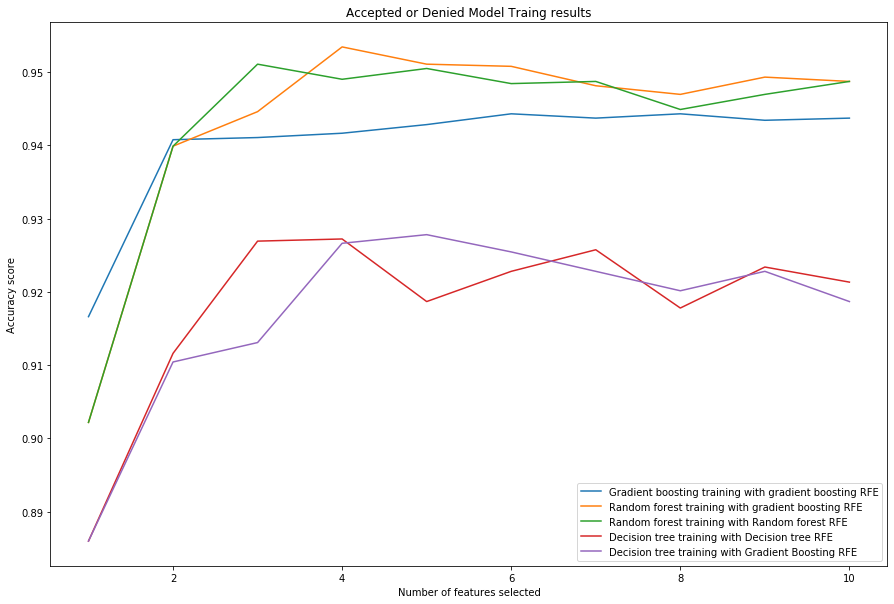

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))

# line 1 points
x1 = number_of_features
y1 = accuracy_gradient_boost_gradient_boost_RFE
# plotting the line 1 points 
plt.plot(x1, y1, label = "Gradient boosting training with gradient boosting RFE")

# line 2 points
x2 = number_of_features
y2 = accuracy_random_forest_gradient_boost_RFE
# plotting the line 1 points 
plt.plot(x2, y2, label = "Random forest training with gradient boosting RFE")


# line 3 points
x3 = number_of_features
y3 = accuracy_random_forest_random_forest_RFE
# plotting the line 2 points 
plt.plot(x3, y3, label = "Random forest training with Random forest RFE")

# line 4 points
x4 = number_of_features
y4 = accuracy_decision_tree_decision_tree_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Decision tree RFE")

# line 5 points
x4 = number_of_features
y4 = accuracy_decision_tree_gradient_boosting_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Gradient Boosting RFE")

plt.xlabel('Number of features selected')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy score')
# Set a title of the current axes.
plt.title('Accepted or Denied Model Traing results')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
fig.savefig("overall-results.png",dpi=100)
# fig1.savefig('tessstttyyy.png', dpi=100)


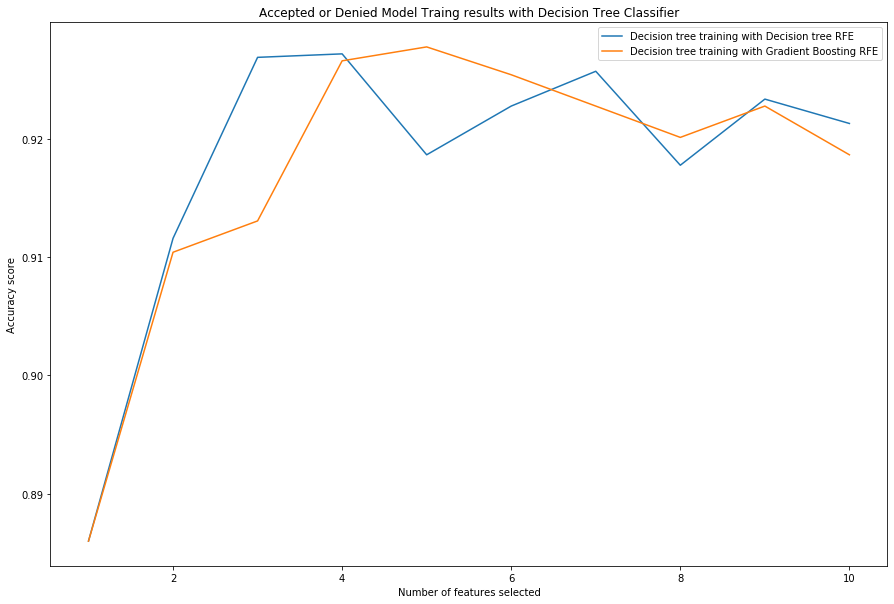

In [53]:
# line 1 points
# x1 = number_of_features
# y1 = accuracy_gradient_boost_gradient_boost_RFE
# # plotting the line 1 points 
# plt.plot(x1, y1, label = "Gradient boosting training with gradient boosting RFE")

# # line 2 points
# x2 = number_of_features
# y2 = accuracy_random_forest_gradient_boost_RFE
# # plotting the line 1 points 
# plt.plot(x2, y2, label = "Random forest training with gradient boosting RFE")


# # line 3 points
# x3 = number_of_features
# y3 = accuracy_random_forest_random_forest_RFE
# # plotting the line 2 points 
# plt.plot(x3, y3, label = "Random forest training with Random forest RFE")
fig = plt.figure(figsize=(15,10))
# line 4 points
x4 = number_of_features
y4 = accuracy_decision_tree_decision_tree_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Decision tree RFE")

# line 5 points
x4 = number_of_features
y4 = accuracy_decision_tree_gradient_boosting_RFE
# plotting the line 2 points 
plt.plot(x4, y4, label = "Decision tree training with Gradient Boosting RFE")

plt.xlabel('Number of features selected')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy score')
# Set a title of the current axes.
plt.title('Accepted or Denied Model Traing results with Decision Tree Classifier')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
fig.savefig("decisiontree-results.png")

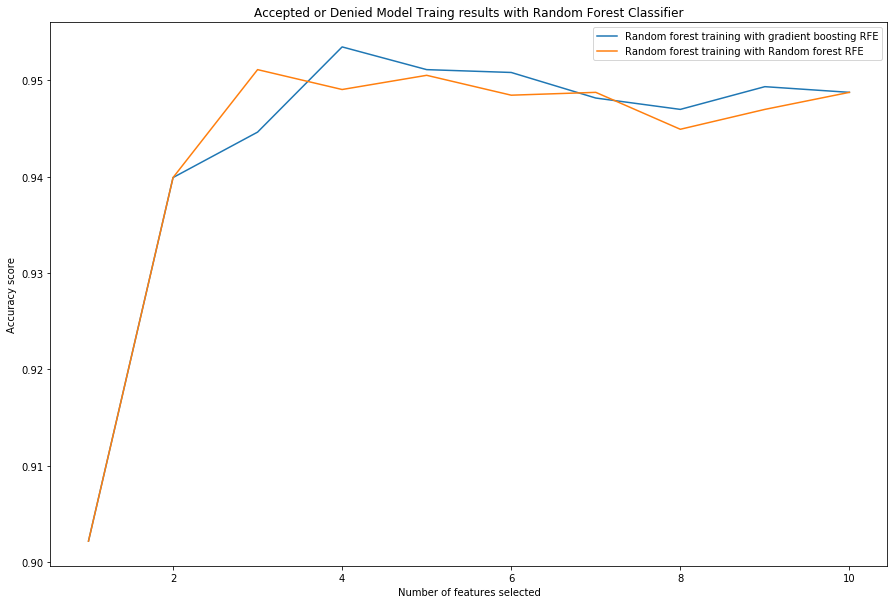

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))

# # line 1 points
# x1 = number_of_features
# y1 = accuracy_gradient_boost_gradient_boost_RFE
# # plotting the line 1 points 
# plt.plot(x1, y1, label = "Gradient boosting training with gradient boosting RFE")

# line 2 points
x2 = number_of_features
y2 = accuracy_random_forest_gradient_boost_RFE
# plotting the line 1 points 
plt.plot(x2, y2, label = "Random forest training with gradient boosting RFE")


# line 3 points
x3 = number_of_features
y3 = accuracy_random_forest_random_forest_RFE
# plotting the line 2 points 
plt.plot(x3, y3, label = "Random forest training with Random forest RFE")

# # line 4 points
# x4 = number_of_features
# y4 = accuracy_decision_tree_decision_tree_RFE
# # plotting the line 2 points 
# plt.plot(x4, y4, label = "Decision tree training with Decision tree RFE")

# # line 5 points
# x4 = number_of_features
# y4 = accuracy_decision_tree_gradient_boosting_RFE
# # plotting the line 2 points 
# plt.plot(x4, y4, label = "Decision tree training with Gradient Boosting RFE")

plt.xlabel('Number of features selected')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy score')
# Set a title of the current axes.
plt.title('Accepted or Denied Model Traing results with Random Forest Classifier')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
fig.savefig("random-forest-results.png")

In [55]:
# for index in range(1, 16):
#     decisionTreeRFELoop = RFE(tree.DecisionTreeClassifier(max_depth = 5),n_features_to_select = index)
#     decisionTreeRFELoop.fit(X_train,y_train)
#     X_train_dec_RFELoop = decisionTreeRFELoop.transform(X_train)
#     X_test_dec_RFELoop = decisionTreeRFELoop.transform(X_test)
#     print("number of selected features:", index)
#     run_randomForest(X_train_dec_RFELoop, X_test_dec_RFELoop, y_train, y_test)
#     print()

In [56]:
# for index in range(1, 16):
#     randomForestRFELoop = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),n_features_to_select = index)
#     randomForestRFELoop.fit(X_train,y_train)
#     X_train_Rand_RFELoop = randomForestRFELoop.transform(X_train)
#     X_test_Rand_RFELoop = randomForestRFELoop.transform(X_test)
#     print("selected features:", index)
#     run_decisionTree(X_train_Rand_RFELoop, X_test_Rand_RFELoop, y_train, y_test)
#     print()

In [57]:
gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = 4)
gradientBoostRFELoop.fit(X_train,y_train)
X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
X_test_Grad_RFELoop = gradientBoostRFELoop.transform(X_test)
print("number of selected features:", 4)
accuracy_random_forest_gradient_boost_RFE[3] = run_randomForest(X_train_Grad_RFELoop, X_test_Grad_RFELoop, y_train, y_test)
print()

number of selected features: 4
Accuracy:  0.9534472598703595
Classification report:                precision    recall  f1-score   support

           0       0.82      0.60      0.69       295
           1       0.96      0.99      0.97      3099

    accuracy                           0.95      3394
   macro avg       0.89      0.79      0.83      3394
weighted avg       0.95      0.95      0.95      3394




In [58]:
def run_randomForest_save_data(X_train, X_test, y_train):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    pd.DataFrame(y_pred, columns=['prediction']).to_csv('prediction.csv')

In [59]:
X_submit_raw = pd.read_csv("test.csv")
X_submit = X_submit_raw.drop(['tripid', 'pickup_time', 'drop_time'], axis=1)
X_submit.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,924,42,2.4486,148,6.83454,79.8750,6.77490,79.8840,289.27
1,10.5,4249,20,0.0000,91,6.91168,79.8723,6.55091,79.9706,1912.70
2,10.5,1552,255,2.6588,23,6.92145,79.8478,6.90539,79.8989,394.00
3,10.5,462,16,0.0000,198,6.77433,79.9416,6.80401,79.9407,154.32
4,10.5,814,392,12.3692,69,6.97968,79.9130,6.98875,79.8914,147.47


In [60]:
gradientBoostRFELoop = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0),n_features_to_select = 4)
gradientBoostRFELoop.fit(X_train,y_train)
X_train_Grad_RFELoop = gradientBoostRFELoop.transform(X_train)
X_submit_Grad_RFELoop = gradientBoostRFELoop.transform(X_submit)
print("number of selected features:", 4)
accuracy_random_forest_gradient_boost_RFE[3] = run_randomForest_save_data(X_train_Grad_RFELoop, X_submit_Grad_RFELoop, y_train)
print()

number of selected features: 4

